<a href="https://colab.research.google.com/github/DevasivaBA/DEV_Projects/blob/main/geospatial_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install contextily
!pip install shapely

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 49.9 MB/s eta 0:00:00


In [7]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

In [8]:
ames = pd.read_csv('/content/Ames.csv')

In [10]:
#convert the DataFrame to a geoDataFrame

geometry = [Point(xy) for xy in zip(ames['Longitude'], ames['Latitude'])]
geo_df = gpd.GeoDataFrame(ames, geometry = geometry)


In [12]:
#set CRS for geoDataFrame
geo_df.crs = "EPSG:4326"

In [14]:
# Convex Hull provides boundary that encloses all data points

convex_hull = geo_df.unary_union.convex_hull
convex_hull_geo = gpd.GeoSeries(convex_hull, crs = "EPSG:4326")
convex_hull_transformed = convex_hull_geo.to_crs(epsg=3857)
buffered_hull = convex_hull_transformed.buffer(500)

<ipython-input-14-bf201f7eb81c>:3: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  convex_hull = geo_df.unary_union.convex_hull


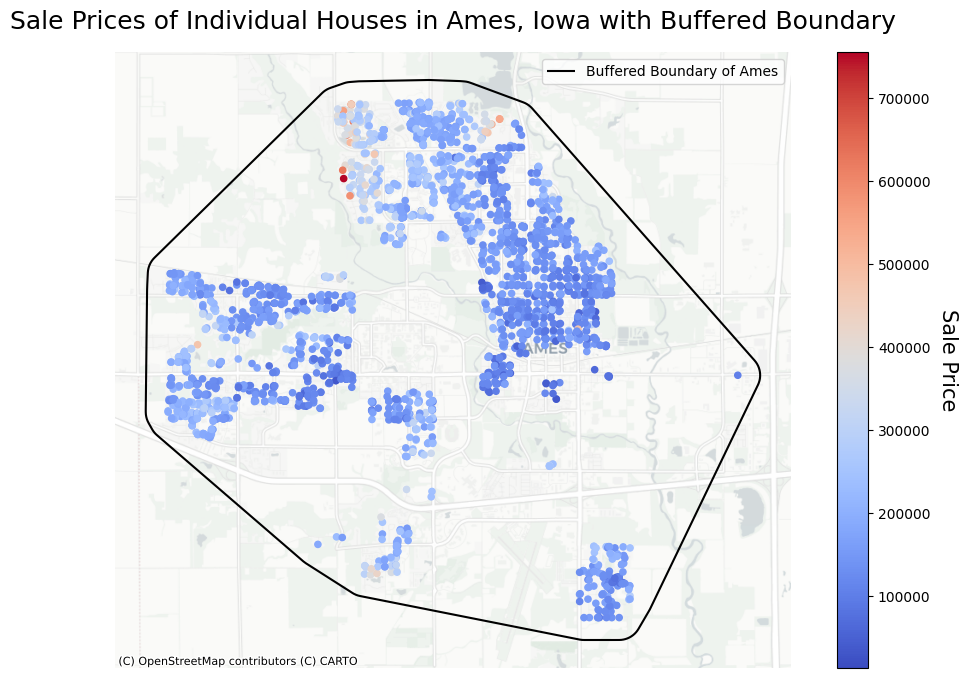

In [15]:
#visualizing the Data
# Plotting the map with Sale Prices, a basemap, and the buffered convex hull as a border
fig, ax = plt.subplots(figsize=(12, 8))
geo_df.to_crs(epsg=3857).plot(column='SalePrice', cmap='coolwarm', ax=ax, legend=True,
                              markersize=20)
buffered_hull.boundary.plot(ax=ax, color='black', label='Buffered Boundary of Ames')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()
ax.legend(loc='upper right')
colorbar = ax.get_figure().get_axes()[1]
colorbar.set_ylabel('Sale Price', rotation=270, labelpad=20, fontsize=15)
plt.title('Sale Prices of Individual Houses in Ames, Iowa with Buffered Boundary',
          fontsize=18)
plt.show()
